El punto de partida es la consideración de que existe un gran problema con la vivienda y el turismo de alquiler de AirBnb en ciudades. Vamos a trabajar con un dataset para analizar este problema.

Se sabe que muchos propietarios privados encuentran más rentable y lucrativo alquilar pisos a turistas que a locales (especialmente en los centros de las ciudades), y muchas agencias inmobiliarias compran propiedades y las convierten también en alojamientos turísticos. Todo esto tiene como efecto reducir la oferta, aumentar los precios y empujar a los comercios locales a otros barrios, dejando solo a los turistas en el centro.

Con esto en mente, y sabiendo que Airbnb es hoy en día uno de los mercados en línea más populares para alojamiento, investigaremos los datos para:

Por un lado evaluar el impacto que tiene Airbnb en la vivienda (en este caso se analiza la ciudad de Madrid).

Por otro lado indagar sobre quién, cuándo y cómo se alquila y posiblemente hacer consideraciones sobre los flujos turísticos.


Ejercicio de airbnb Madrid.

A continuación, expondré y explicaré los pasos que se han ido ejecutando para el análisis. 

la primera es el encabezado de WordCloud con los barrios de Madrid capital.



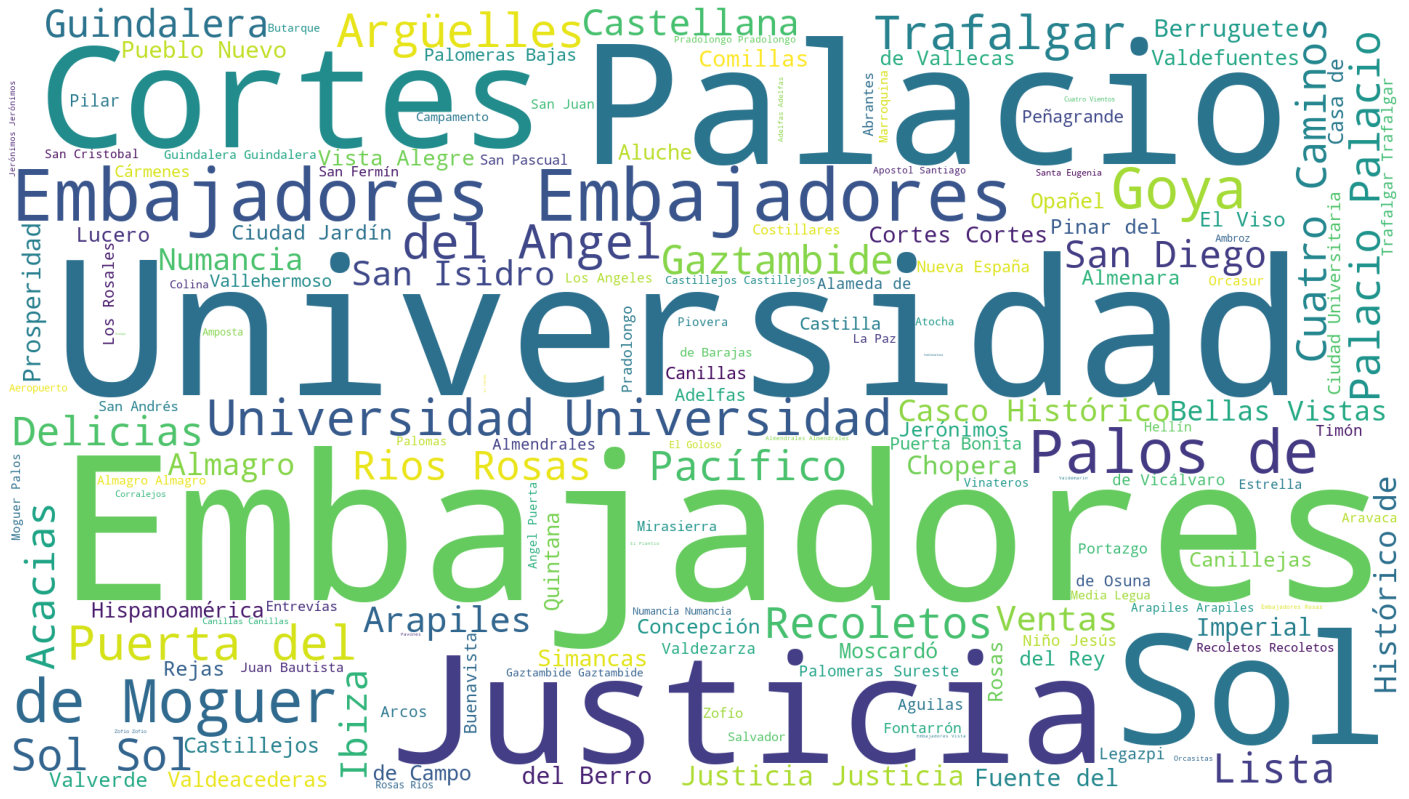

In [ ]:
from wordcloud import WordCloud
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(Madrid.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Instalo geopandas, chart_studio y plotly

In [ ]:
!pip install geopandas
!pip install chart_studio
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 20.7 MB/s 
     |████████████████████████████████| 16.7 MB 4.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.4 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=5e0050330658b8e3e5a2e6785ad68a38246303085be9dee91095f308df943fd2
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importo las librerías con las que voy a trabajar. 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Madrid = pd.read_csv("/content/drive/MyDrive/0708/datos/datasets_ucis/airbnb_anuncios.csv")


Empiezo a limpiar los datos que me ofrece la carga del conjunto de datos. 

In [ ]:
Madrid.shape

(20837, 16)

Imprimimos los tipos de datos del conjunto de datos

In [ ]:
Madrid.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
Madrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20837 entries, 0 to 20836
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20837 non-null  int64  
 1   name                            20832 non-null  object 
 2   host_id                         20837 non-null  int64  
 3   host_name                       20822 non-null  object 
 4   neighbourhood_group             20837 non-null  object 
 5   neighbourhood                   20837 non-null  object 
 6   latitude                        20837 non-null  float64
 7   longitude                       20837 non-null  float64
 8   room_type                       20837 non-null  object 
 9   price                           20837 non-null  int64  
 10  minimum_nights                  20837 non-null  int64  
 11  number_of_reviews               20837 non-null  int64  
 12  last_review                     

Valores duplicados

Analice los valores duplicados por las columnas.

Use el comando duplicated junto con sum.

En esta ocasión quite los valores duplicados con drop_duplicates.

Eliminamos los duplicados en caso de que los haya.

In [ ]:
Madrid.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
20832    False
20833    False
20834    False
20835    False
20836    False
Length: 20837, dtype: bool

In [ ]:
Madrid.duplicated().sum()
Madrid.drop_duplicates(inplace=True)

Compruebo los valores nulos

In [ ]:
Madrid.isnull().sum()

id                                   0
name                                 5
host_id                              0
host_name                           15
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4654
reviews_per_month                 4654
calculated_host_listings_count       0
availability_365                     0
dtype: int64

Eliminamos las columnas que no nos aportan datos 

In [ ]:
Madrid.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

Vuelvo a la función head y elijo 5 para ver si se han eliminado las columnas innecesarias. 

In [ ]:
Madrid.head(5)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,13660,Chamartín,Hispanoamérica,40.45628,-3.67763,Private room,70,1,65,0.56,1,53
1,83531,Latina,Cármenes,40.40341,-3.74084,Private room,17,4,33,0.55,2,48
2,101471,Centro,Universidad,40.42202,-3.70395,Entire home/apt,80,5,2,0.03,1,354
3,101653,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,64,0.63,1,301
4,114340,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,136,1.19,1,337


Analice la columna neighbourhood_group y contee los valores. Use el parámetro normalize con valores True o False para ver su utilidad.

Link de referencia: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [ ]:
Madrid.neighbourhood_group.value_counts(normalize=True)

Centro                   0.469021
Salamanca                0.065988
Chamberí                 0.063877
Arganzuela               0.053799
Tetuán                   0.040217
Carabanchel              0.032538
Retiro                   0.031914
Latina                   0.029563
Ciudad Lineal            0.029419
Puente de Vallecas       0.028363
Chamartín                0.026443
Moncloa - Aravaca        0.026011
San Blas - Canillejas    0.025148
Usera                    0.017325
Hortaleza                0.015933
Fuencarral - El Pardo    0.014397
Villaverde               0.007967
Barajas                  0.007919
Moratalaz                0.006095
Villa de Vallecas        0.004943
Vicálvaro                0.003119
Name: neighbourhood_group, dtype: float64

Descripción shape, dtypes e info.

In [ ]:
Madrid.shape

(20837, 12)

In [ ]:
Madrid.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
Madrid.info

<bound method DataFrame.info of          host_id neighbourhood_group      neighbourhood  latitude  longitude  \
0          13660           Chamartín     Hispanoamérica  40.45628   -3.67763   
1          83531              Latina           Cármenes  40.40341   -3.74084   
2         101471              Centro        Universidad  40.42202   -3.70395   
3         101653              Centro           Justicia  40.41995   -3.69764   
4         114340          Arganzuela            Legazpi  40.38985   -3.69011   
...          ...                 ...                ...       ...        ...   
20832  226958922           Chamartín           Castilla  40.47847   -3.68395   
20833  178608863  Puente de Vallecas  Palomeras Sureste  40.38533   -3.63968   
20834  182062359              Centro        Universidad  40.42182   -3.70336   
20835   31425029              Centro        Embajadores  40.40896   -3.70107   
20836    6903368              Centro           Justicia  40.41973   -3.69666   

       

Reemplazo el 'reviews per month' con cero y vemos el cambio

In [ ]:
Madrid.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
Madrid.reviews_per_month.isnull().sum()

0

Elimino los valores NaN del conjunto de datos ya que estos valores están vacíos

In [ ]:
Madrid.isnull().sum()
Madrid.dropna(how='any',inplace=True)
Madrid.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20837 entries, 0 to 20836
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   host_id                         20837 non-null  int64  
 1   neighbourhood_group             20837 non-null  object 
 2   neighbourhood                   20837 non-null  object 
 3   latitude                        20837 non-null  float64
 4   longitude                       20837 non-null  float64
 5   room_type                       20837 non-null  object 
 6   price                           20837 non-null  int64  
 7   minimum_nights                  20837 non-null  int64  
 8   number_of_reviews               20837 non-null  int64  
 9   reviews_per_month               20837 non-null  float64
 10  calculated_host_listings_count  20837 non-null  int64  
 11  availability_365                20837 non-null  int64  
dtypes: float64(3), int64(6), object(

Veo las variables continuas.

In [ ]:
Madrid.describe()

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.083700e+04,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000,20837.000000
mean,1.014144e+08,40.420548,-3.694500,134.065364,4.373614,35.163891,1.521432,12.188559,155.097567
std,8.956078e+07,0.021881,0.027793,381.207575,20.428777,61.863053,1.916618,32.156130,133.746263
min,5.154000e+03,40.319480,-3.890940,8.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,2.232182e+07,40.409550,-3.707490,40.000000,1.000000,1.000000,0.070000,1.000000,17.000000
50%,7.574288e+07,40.418900,-3.701180,65.000000,2.000000,8.000000,0.750000,2.000000,123.000000
75%,1.719263e+08,40.429020,-3.689110,100.000000,3.000000,42.000000,2.360000,7.000000,300.000000
max,2.960847e+08,40.573990,-3.527660,9999.000000,1125.000000,594.000000,34.230000,231.000000,365.000000


Pido ver todas las columnas que existen.

In [ ]:
Madrid.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

Analice la correlación de las variables

Use el comando corr y de Seaborn use heatmap para respresentarlo.

Importe la librería matplotlib para facilitar la representación de los futuros gráficos.

import matplotlib.pyplot as pl

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

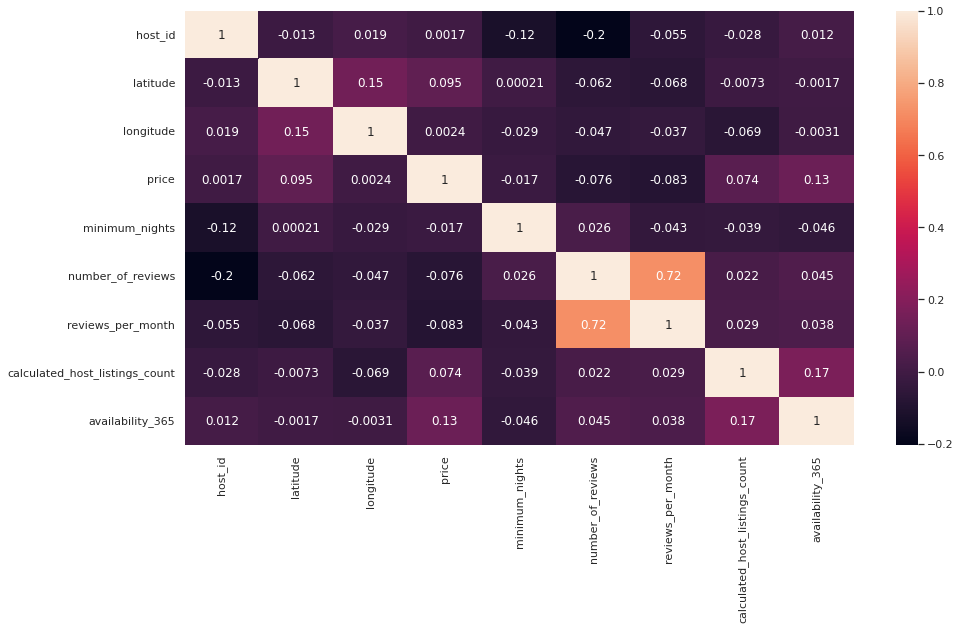

In [ ]:
corr = Madrid.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
Madrid.columns

Identifique los barrios del dataset

Use el comando unique en la columna neighbourhood_group.



In [ ]:
Madrid.shape

(20837, 12)

In [ ]:
Madrid['neighbourhood_group'].unique()

array(['Chamartín', 'Latina', 'Centro', 'Arganzuela', 'Salamanca',
       'Tetuán', 'Fuencarral - El Pardo', 'Ciudad Lineal', 'Chamberí',
       'Villaverde', 'Hortaleza', 'Moncloa - Aravaca', 'Carabanchel',
       'Retiro', 'San Blas - Canillejas', 'Villa de Vallecas', 'Barajas',
       'Usera', 'Puente de Vallecas', 'Moratalaz', 'Vicálvaro'],
      dtype=object)

Represente los barrios y su importancia

Use countplot de Seaborn en la columna neighbourhood_group.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood Group')

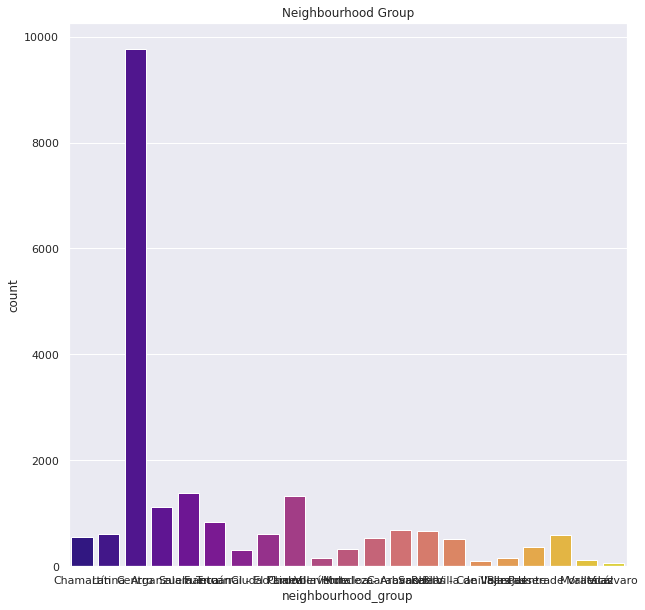

In [ ]:
sns.countplot(Madrid['neighbourhood_group'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

Realice ahora una representación de los barrios por separado y sin agrupar.

Use countplot de Seaborn en la columna neighbourhood.



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

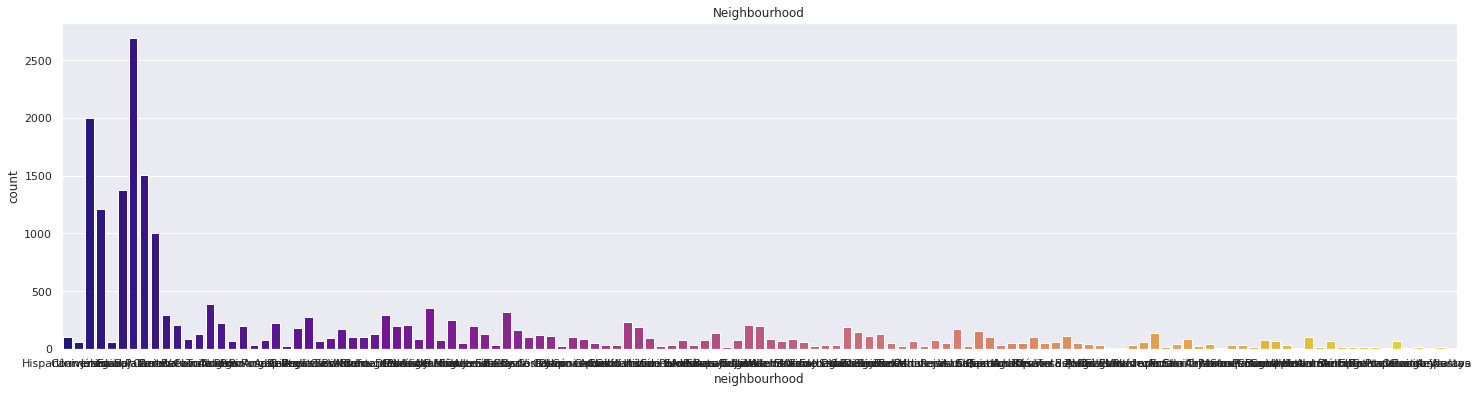

In [ ]:
sns.countplot(Madrid['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

Represente los tipos de habitación que se ofertan

Use la columna room_type.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Restaurants delivering online or Not')

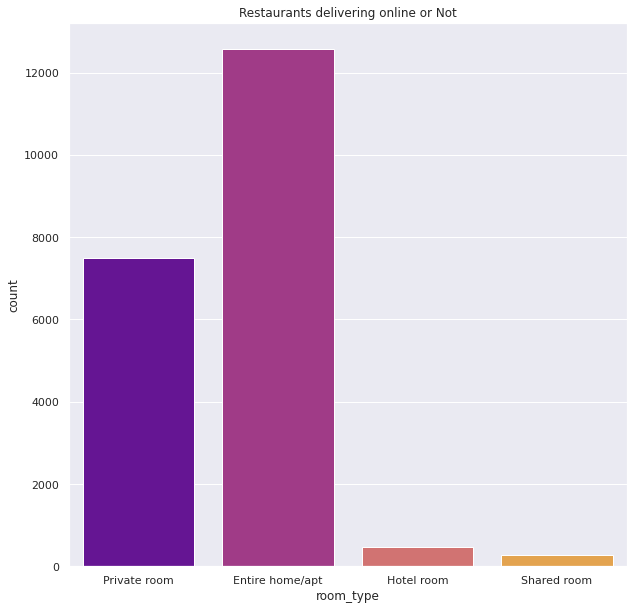

In [ ]:
sns.countplot(Madrid['room_type'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Restaurants delivering online or Not')

Relación entre la columna neighbour_group y availability_365 que corresponde a la disponiblidad

Puede usar un boxplot de sns. ¿Qué interpreta?

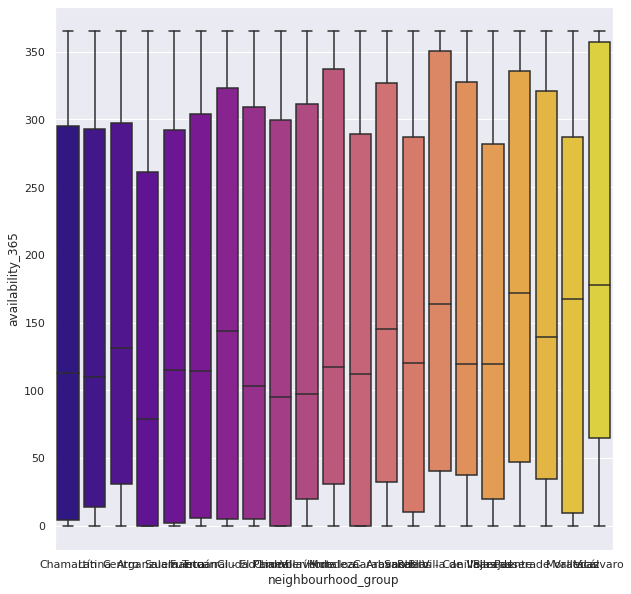

In [ ]:
#cambio de etiqueta, poner barras en horizontal. 
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=Madrid, x='neighbourhood_group',y='availability_365',palette='plasma')

Relicemos un mapa de los grupos de barrios

Use un scatterplot de sns.

Para ello deberá aportar las columnas longitude, latitude y como hue aporte la columna neighbourhood_group.

Link de referencia: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


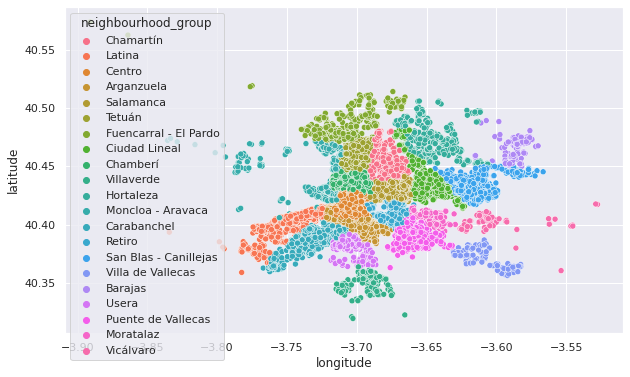

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(Madrid.longitude,Madrid.latitude,hue=Madrid.neighbourhood_group)
plt.ioff()

Realice el mapa anterior pero esta vez de los barrios

Siguiendo el comando anterior, use la columna neighbourhood.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


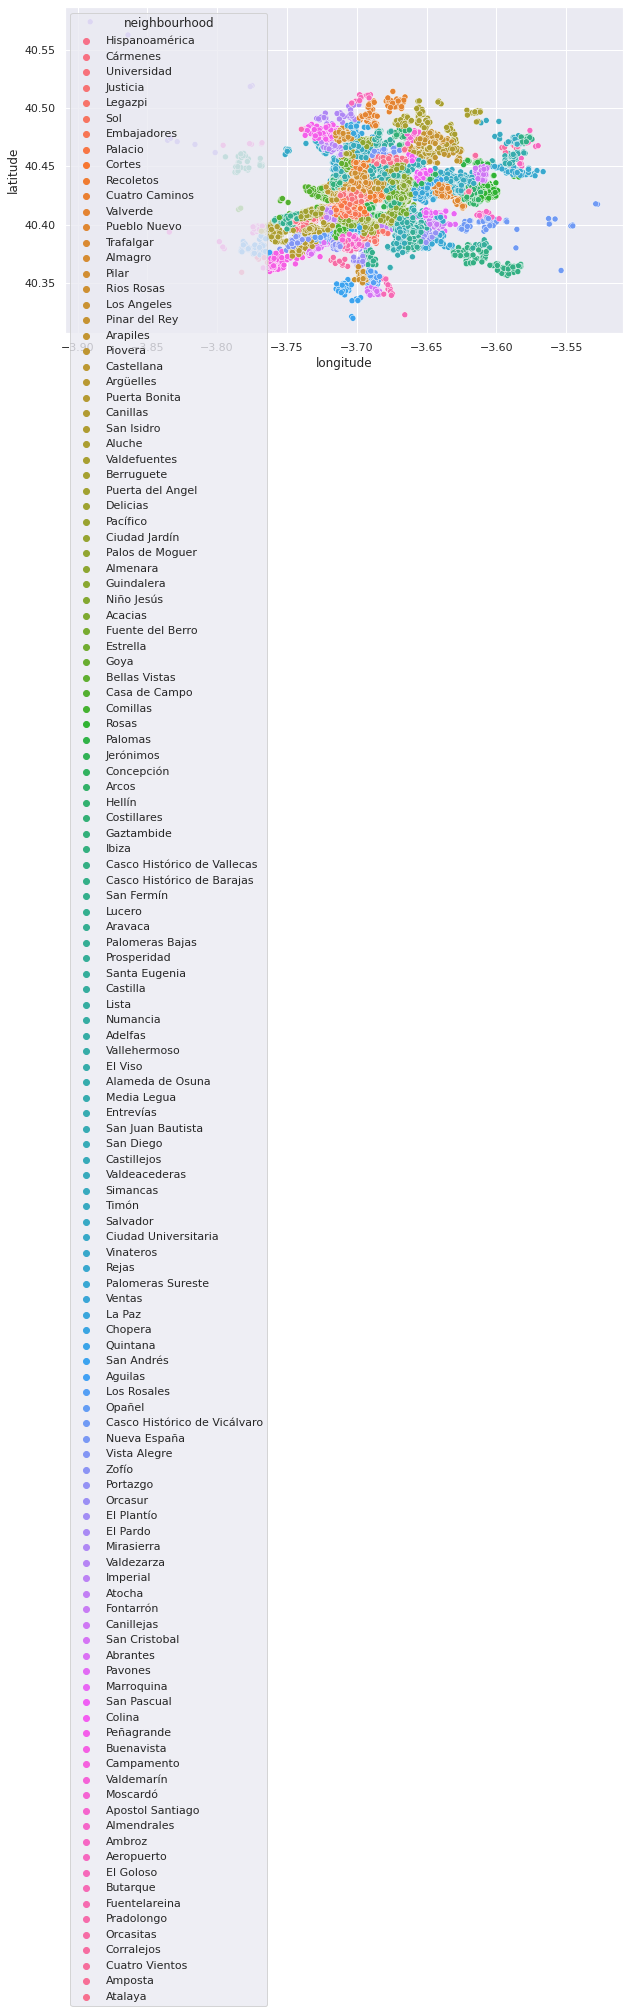

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(Madrid.longitude,Madrid.latitude,hue=Madrid.neighbourhood)
plt.ioff()


Cree un mapa sobre el tipo de habitación por barrios

Esta vez, use la columna room_type.

¿Qué indica el gráfico?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


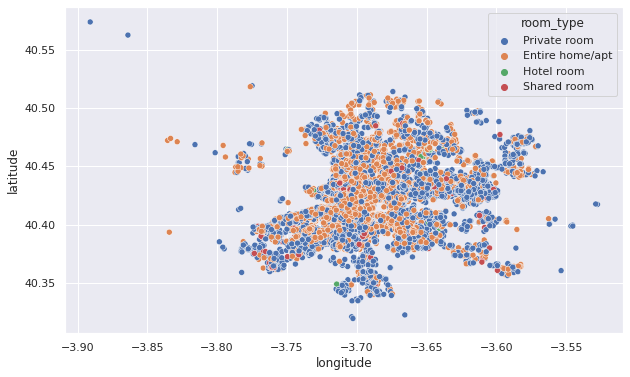

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(Madrid.longitude,Madrid.latitude,hue=Madrid.room_type)
plt.ioff()

Disponibilidad de las habitaciones

Cree un mapa para ver la disponibilidad de las habitaciones.

Para ello use la columna availability_365.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


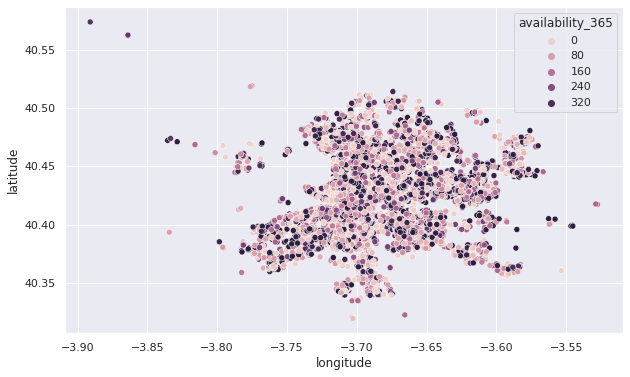

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(Madrid.longitude,Madrid.latitude,hue=Madrid.availability_365)
plt.ioff()